<a href="https://colab.research.google.com/github/hirokiyamauch/NLP_100knock/blob/%E7%AC%AC7%E7%AB%A0/60_69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

61

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

61

In [ ]:
print("cos(United_States, U.S.) = %1.3f" % model.similarity("United_States", "U.S."))

cos(United_States, U.S.) = 0.731


62

In [ ]:
total = model.most_similar(positive=["United_States"], topn=10)
total

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

63

In [ ]:
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

64

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-02-07 10:23:10--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.215.128, 2607:f8b0:400c:c0c::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.215.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2022-02-07 10:23:11 (226 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!wc /content/questions-words.txt

 19558  78204 603955 /content/questions-words.txt


In [ ]:
with open("/content/questions-words.txt", "r") as f:
    data = []
    for line in f:
        line = line.split()
        #: capital-common-countriesを除外
        if line[0] == ":":
            title = line[1]
        else:
            word ,cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn= 1)[0]
            data.append([title]+ [line][0]+ [word]+ [cos])


65

In [ ]:
with open("65ai.txt", "w") as f:
    for line in data:
        f.write(" ".join(str(li) for li in line))
        f.write("\n")

In [ ]:
import pandas as pd
df = pd.read_csv("65ai.txt", sep=" ", header=None)
#意味的にはgramなし,gramありが文法
sem = df[~(df[0].str.contains('gram'))]
sym = df[(df[0].str.contains('gram'))]
print("意味的アナロジー", (sem[4] == sem[5]).sum() / len(sem))
print("文法的アナロジー", (sym[4] == sym[5]).sum() / len(sym))

意味的アナロジー 0.7308602999210734
文法的アナロジー 0.7400468384074942


66

In [ ]:
!wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip

--2022-02-07 13:17:50--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2022-02-07 13:17:50 (1.21 MB/s) - ‘wordsim353.zip’ saved [23257/23257]



In [ ]:
!unzip wordsim353.zip

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
def ranking_sim(my_df):
    vec = []
    hum = []
    for i, line in my_df.iterrows():
        word1 = line[0]
        word2 = line[1]

        #modelにwordが含まれているかを確認
        if word1 in model and word2 in model:
           cos = model.similarity(word1, word2)
           vec.append(cos)
           hum.append(line[2])
    
    return vec, hum

from scipy.stats import spearmanr

df = pd.read_csv("/content/combined.csv")

vec, hum = ranking_sim(df)
#スピアマン相関係数を求める
correlation, pvalue = spearmanr(vec, hum)
print(correlation) 


0.7000166486272194


67

In [ ]:
!head country.txt

1 アフガニスタン　　Afghanistan
2 アルバニア　　Albania
3 アルジェリア　　Algeria
4 アンドラ　　Andorra
5 アンゴラ　　Angola
6 アンティグア・バーブーダ　　Antigua and Barbuda
7 アルゼンチン　　Argentina
8 アルメニア　　Armenia
9 オーストラリア　　Australia
10 オーストリア　　Austria


In [ ]:
from sklearn.cluster import KMeans

df = pd.read_csv("country.txt", sep="　", header=None)
#capital-common-countries|capital-worldを含んでいるのを抽出

vec_con = []
def vec_country(my_df):
    vec_con = []
    name_con = []
    index_con = []
    for i, line in df.iterrows():
      word = line[2]
      if word in model:
          vec_con.append(model[word])
          index_con.append(line[2])
          name_con.append(line[0] + " " + line[2])

    return vec_con, index_con ,name_con

vec_con, index_con, name_con = vec_country(df)
vec_con_np = np.array(vec_con)
index_con_np = np.array(index_con)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
import numpy as np
#k-means法
model_kmeans = KMeans(n_clusters=5, random_state=0)
# 学習させる フィッティング
model_kmeans.fit(vec_con_np)
cluster  = model_kmeans.predict(vec_con_np)

In [ ]:
for i in range(len(cluster)):
    print("国名: ", name_con[i], " クラス: ", cluster[i])

国名:  1 アフガニスタン Afghanistan  クラス:  4
国名:  2 アルバニア Albania  クラス:  1
国名:  3 アルジェリア Algeria  クラス:  3
国名:  4 アンドラ Andorra  クラス:  1
国名:  5 アンゴラ Angola  クラス:  3
国名:  7 アルゼンチン Argentina  クラス:  1
国名:  8 アルメニア Armenia  クラス:  2
国名:  9 オーストラリア Australia  クラス:  4
国名:  10 オーストリア Austria  クラス:  1
国名:  12 バハマ Bahamas  クラス:  0
国名:  13 バーレーン Bahrain  クラス:  4
国名:  14 バングラデシュ Bangladesh  クラス:  4
国名:  15 バルバドス Barbados  クラス:  0
国名:  16 ベラルーシ Belarus  クラス:  2
国名:  17 ベルギー Belgium  クラス:  1
国名:  18 ベリーズ Belize  クラス:  0
国名:  19 ベナン Benin  クラス:  3
国名:  20 ブータン Bhutan  クラス:  4
国名:  21 ボリビア Bolivia  クラス:  0
国名:  23 ボツワナ Botswana  クラス:  3
国名:  24 ブラジル Brazil  クラス:  0
国名:  26 ブルガリア Bulgaria  クラス:  1
国名:  28 ブルンジ Burundi  クラス:  3
国名:  30 カンボジア Cambodia  クラス:  4
国名:  31 カメルーン Cameroon  クラス:  3
国名:  32 カナダ Canada  クラス:  1
国名:  34 チャド Chad  クラス:  3
国名:  35 チリ Chile  クラス:  0
国名:  36 中国 China  クラス:  4
国名:  37 コロンビア Colombia  クラス:  0
国名:  38 コモロ Comoros  クラス:  3
国名:  42 クロアチア Croatia  クラス:  1
国名:  43 キューバ Cuba  クラス:  0
国名

68

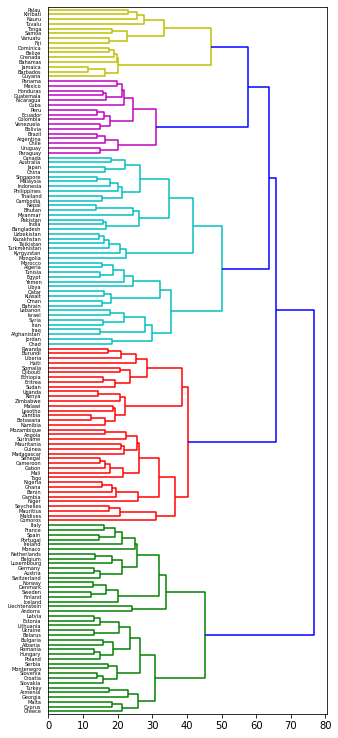

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_iris_std = scaler.fit_transform(vec_con_np)
# 距離計算
dist = hierarchy.distance.pdist(df_iris_std, metric='euclidean')

# クラスタリング
linkage = hierarchy.linkage(dist, method='ward')

# デンドログラム
fig, ax = plt.subplots(figsize=(5,13))
ax = hierarchy.dendrogram(Z=linkage,
                orientation='right',
                labels=index_con)
fig.show()

69

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


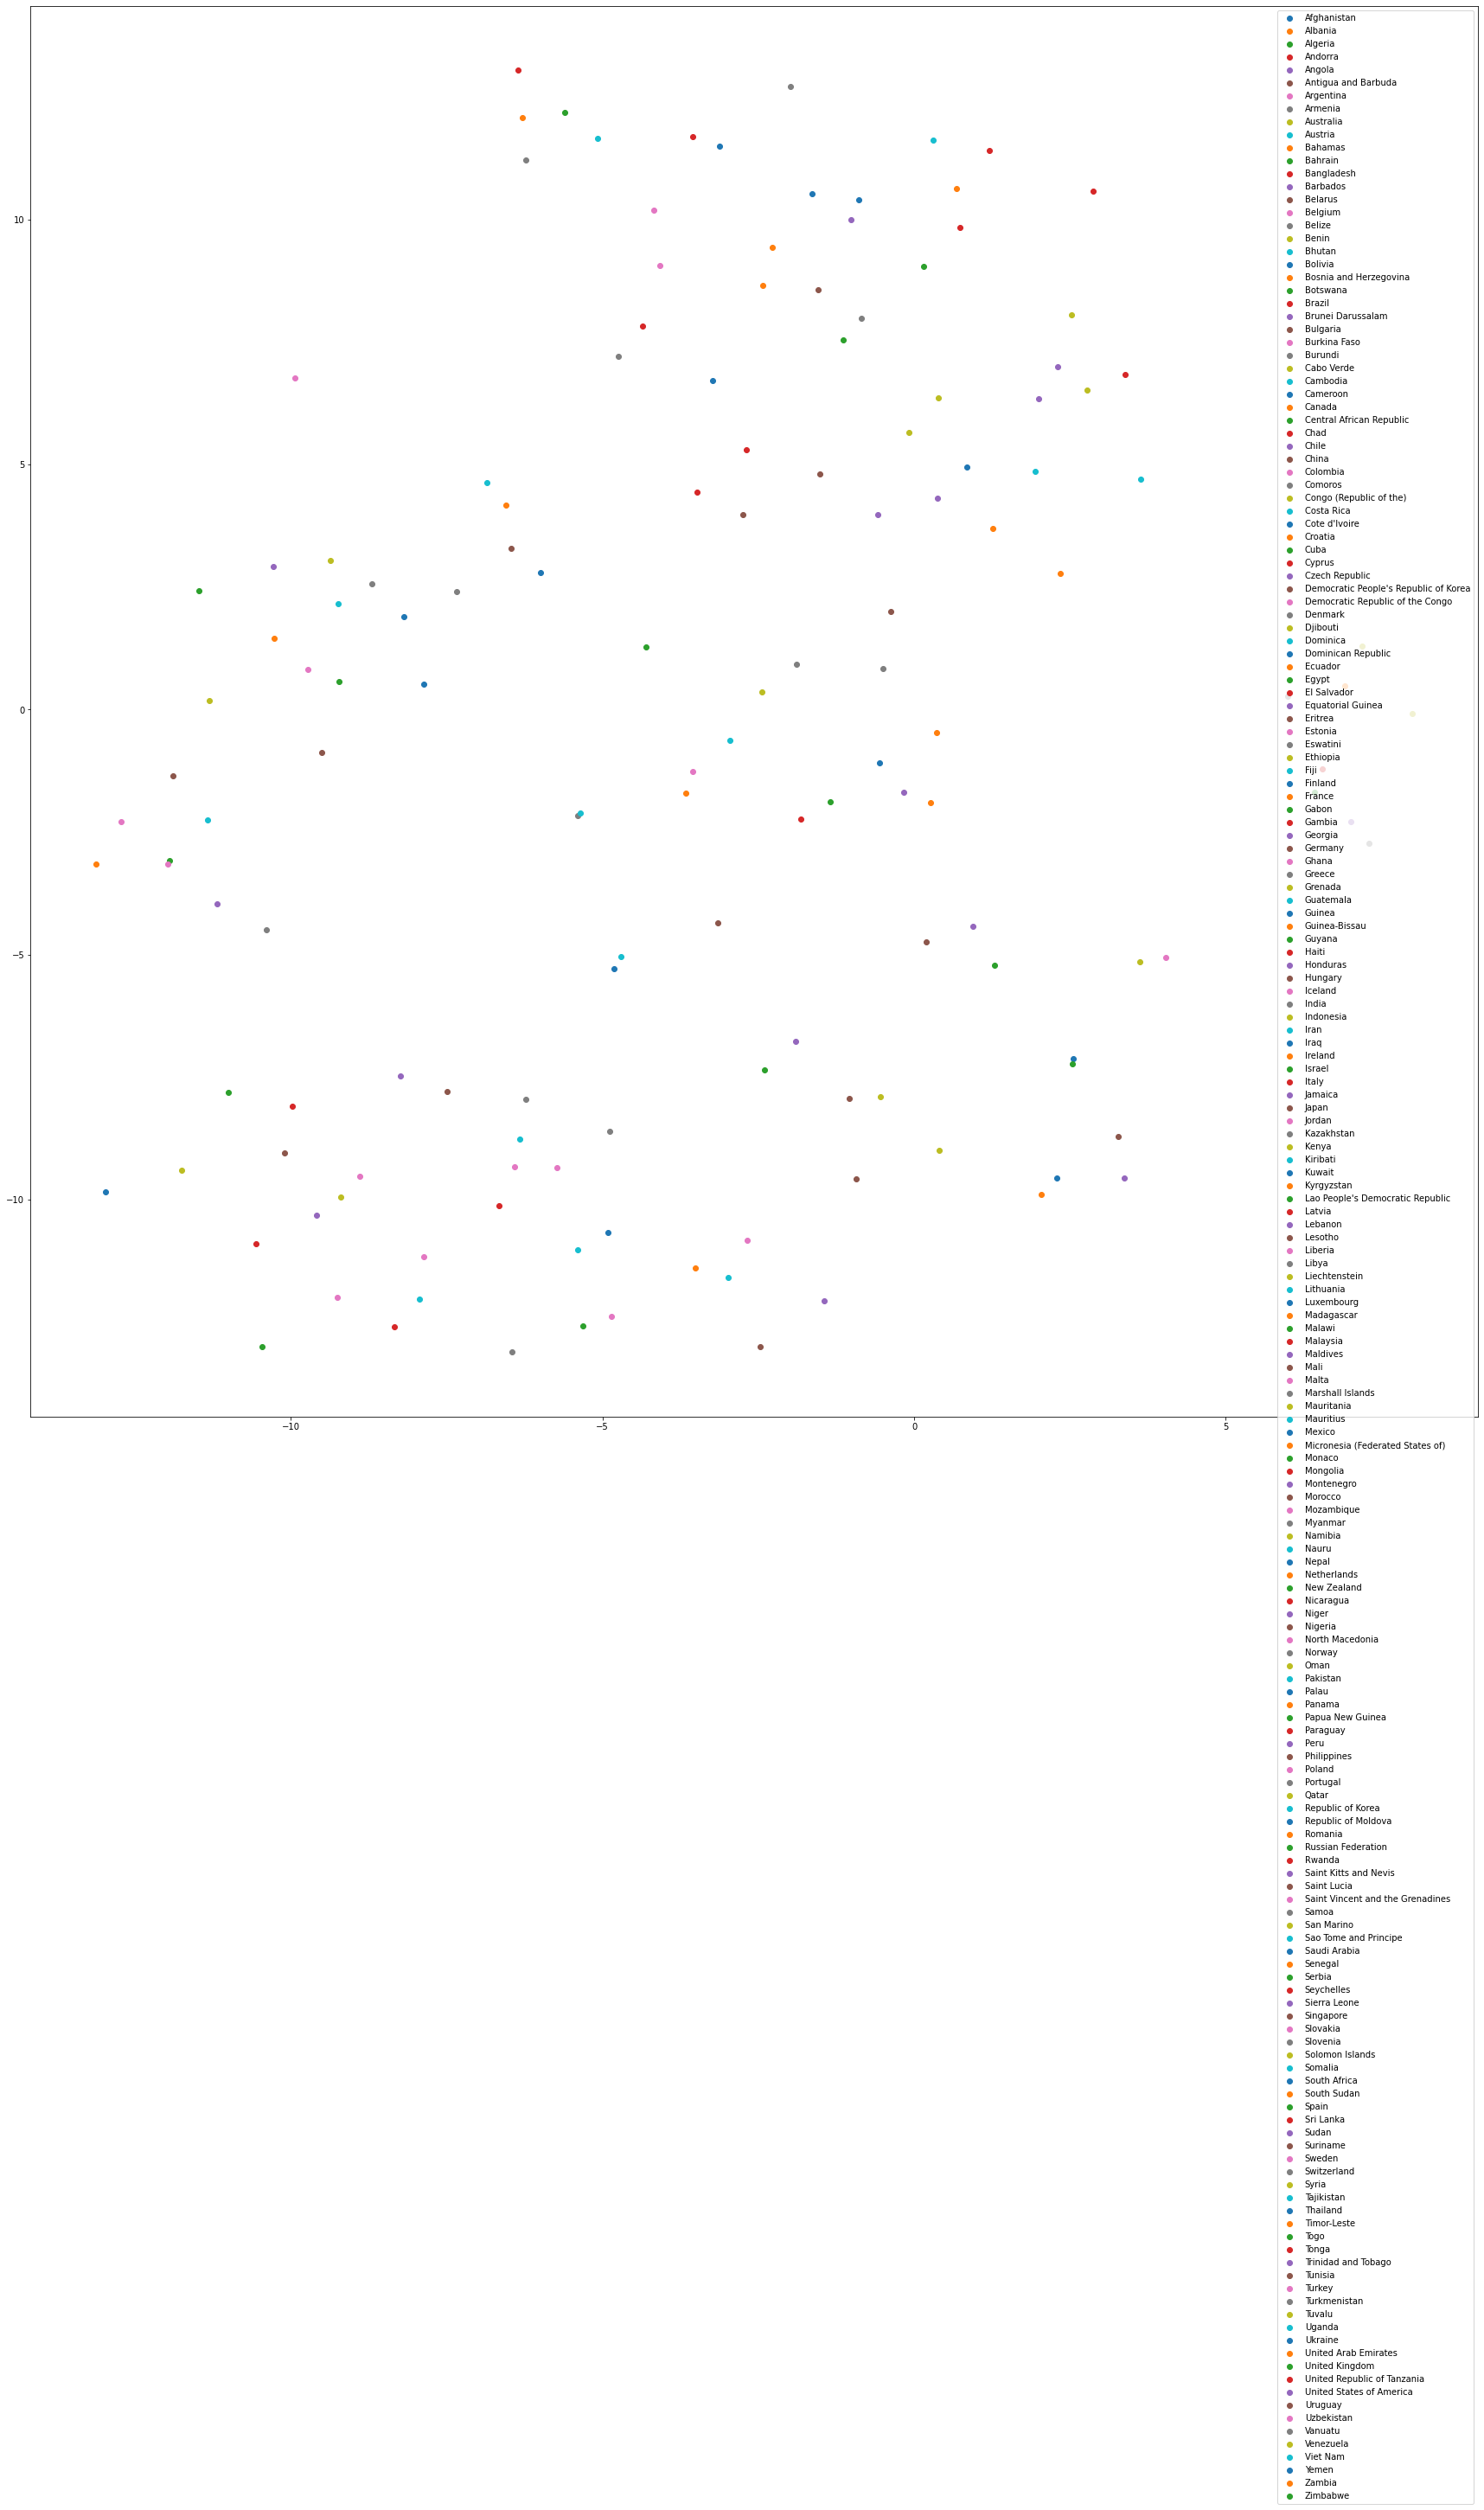

In [ ]:
#t-SNEで次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(vec_con_np)

ddf = pd.concat([df[2], pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)

article_list = ddf[2].unique()

colors =  ["r", "g", "b", "c", "m", "y", "k", "orange","pink"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(article_list):
    tmp_df = ddf[ddf[2] == v]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = v,)
plt.legend()